In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
df = pandas.read_csv('character_list5.csv', encoding='iso-8859-1')
df.index.name = 'row'
df.head(10)

,script_id,imdb_character_name,words,gender,age
row,,,,,
0,280,betty,311,f,35.0
1,280,carolyn johnson,873,f,NaN
2,280,eleanor,138,f,NaN
3,280,francesca johns,2251,f,46.0
4,280,madge,190,f,46.0
5,280,michael johnson,723,m,38.0
6,280,robert kincaid,1908,m,65.0
7,623,bobby korfin,328,m,NaN
8,623,daphne handlova,409,f,28.0


In [2]:
movies_df = df.groupby('script_id', as_index=False)['words'].sum()
f_movies_df = df[df['gender'] == 'f'].groupby('script_id', as_index=False)['words'].sum()
m_movies_df = df[df['gender'] == 'm'].groupby('script_id', as_index=False)['words'].sum()

f_movies_df = f_movies_df.rename(columns={'words': 'words_f'})
m_movies_df= m_movies_df.rename(columns={'words': 'words_m'})

movies_df = movies_df.set_index('script_id')
f_movies_df = f_movies_df.set_index('script_id')
m_movies_df = m_movies_df.set_index('script_id')

movies_df = movies_df.join(m_movies_df)
movies_df = movies_df.join(f_movies_df)
movies_df['pct_m'] = movies_df['words_m'] / movies_df['words']
movies_df['pct_f'] = movies_df['words_f'] / movies_df['words']

moviedata_df = pandas.read_csv('meta_data7.csv', encoding='iso-8859-1')
moviedata_df = moviedata_df.set_index('script_id')
movies_df = movies_df.join(moviedata_df)
movies_df['imdb_link'] = movies_df['imdb_id'].apply(lambda x: 'https://www.imdb.com/title/'+str(x))

odf = pandas.read_csv('oscars.csv')
odf = odf.rename(columns={'year': 'oscar_year'})

movies_df = movies_df.merge(odf, how='outer', on='title')
movies_df['pct_m'] = movies_df['pct_m'].fillna(0)
movies_df['pct_f'] = movies_df['pct_f'].fillna(0)

for yr in range(2009, 2018):
    thisyr_averages_df = pandas.DataFrame(data=[['AVERAGE MOVIE', yr, movies_df[movies_df['year'] == yr]['pct_m'].mean(), movies_df[movies_df['year'] == yr]['pct_f'].mean(), yr]], columns=['title', 'year', 'pct_m', 'pct_f', 'oscar_year'])
    movies_df = pandas.concat((movies_df, thisyr_averages_df), axis=0)

movies_df = movies_df.sort_values(['oscar_year', 'pct_f'], ascending=False)

print('Done')

Done


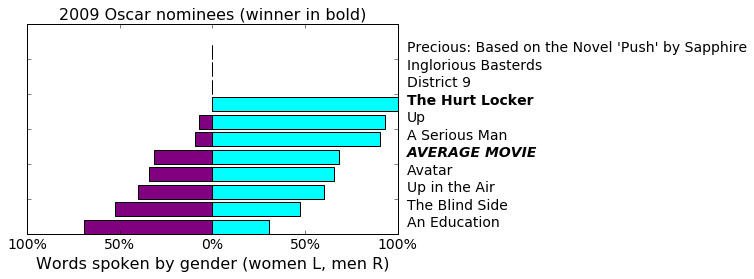

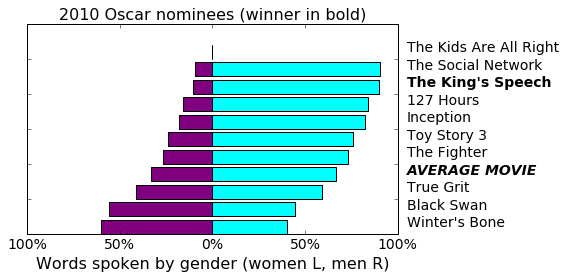

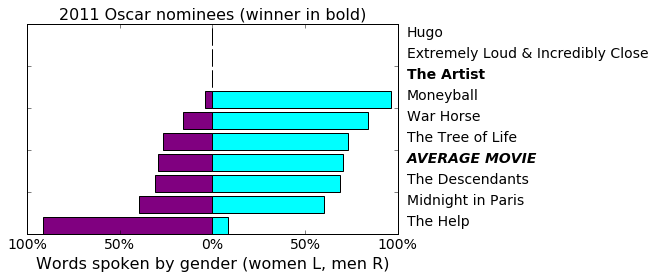

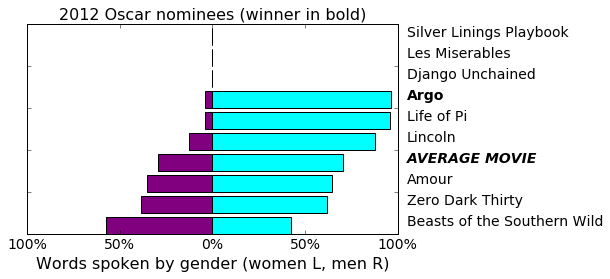

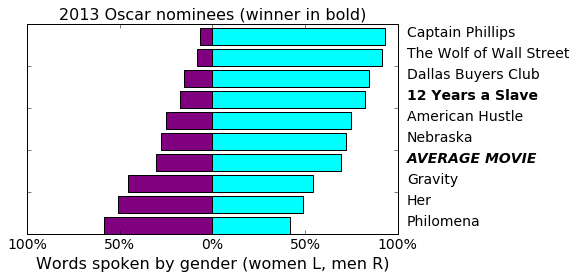

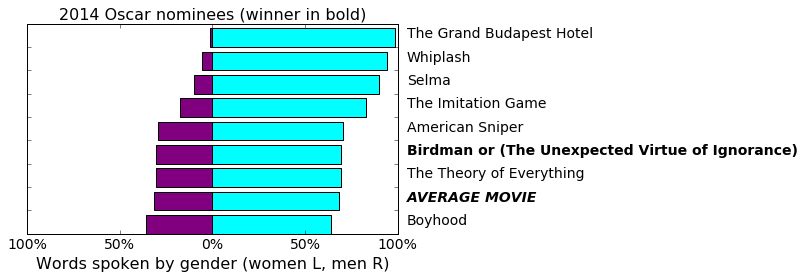

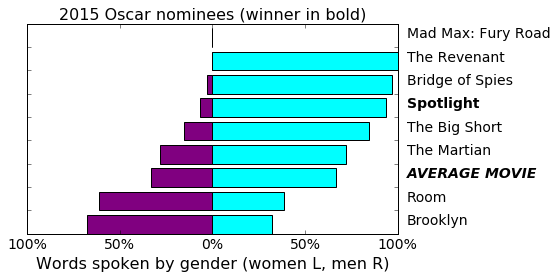

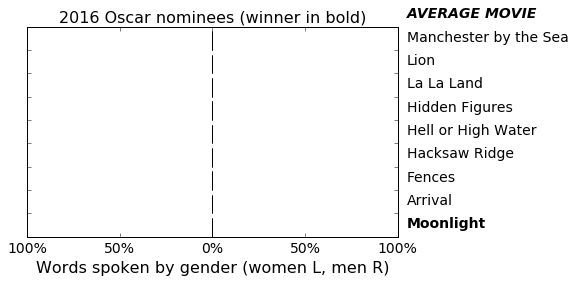

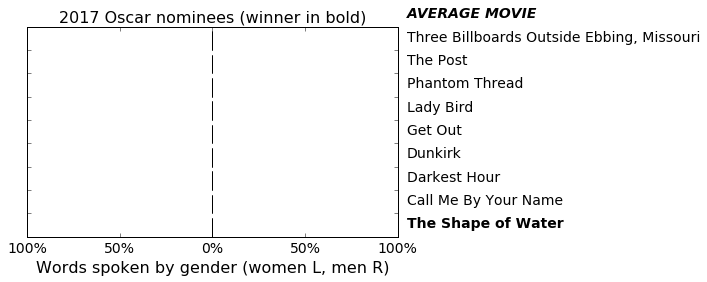

Done


In [6]:
def make_formatter(x, pos):
    return '{:.0%}'.format(abs(x))

os.chdir('/home/idies/workspace/persistent/movies/')

for yr in range(2009, 2018):
#for yr in (2009, 2010, 2012, 2013, 2014):
    fig, ax = plt.subplots()
    thesemovies_df = movies_df[movies_df['oscar_year'] == yr]
    X = np.arange(len(thesemovies_df))
    ax.barh(X, -1*thesemovies_df['pct_f'], color = 'purple')
    ax.barh(X, thesemovies_df['pct_m'], color = 'aqua')
    ax.set_xlim(-1, 1)
    ax.set_xlabel('Words spoken by gender (women L, men R)', fontsize=16)
    
    major_formattor = ticker.FuncFormatter(make_formatter)
    ax.xaxis.set_major_formatter(major_formattor)
    plt.xticks(fontsize=14)

    ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    label_list = thesemovies_df['title'].tolist()
    plt.title('{0:.0f} Oscar nominees (winner in bold)'.format(yr), fontsize=16)
    i = 1
    for thistitle in label_list:
        if (thesemovies_df['winner'][thesemovies_df['title'] == thistitle].values[0] == 1):
            plt.text(1.05, i-0.6, thistitle, fontsize=14, ha='left', weight='bold')
        elif (thistitle == 'AVERAGE MOVIE'):
            plt.text(1.05, i-0.6, thistitle, fontsize=14, ha='left', weight='bold', style='italic')
        else:
            plt.text(1.05, i-0.6, thistitle, fontsize=14, ha='left')
        i = i + 1
    thisfilename = 'movies{0:.0f}.svg'.format(yr)
    fig.tight_layout()
    plt.show()
#    plt.savefig(thisfilename, format='svg')
    
    plt.close()
    #print('Saved {0}'.format(thisfilename))
print('Done')

In [ ]:
for yr in (2009, 2010, 2012, 2013, 2014):
    thisyr_movies_df = movies_df[movies_df['oscar_year'] == yr]
    print('{0:.0f}: average movie is {1:3.0%} dudes, nominees are {2:3.0%} dudes, winner is {3:3.0%} dudes'.format(yr, thisyr_movies_df[thisyr_movies_df['title'] == 'AVERAGE MOVIE']['pct_m'].mean(), thisyr_movies_df[thisyr_movies_df['winner'] == 0]['pct_m'].mean(), thisyr_movies_df[thisyr_movies_df['winner'] == 1]['pct_m'].mean()))
    #    print(thisyr_movies_df[thisyr_movies_df['winner'] == 0].groupby('oscar_year', as_index=False)['pct_f'].mean())
#    print(thisyr_movies_df[thisyr_movies_df['winner'] == 1].groupby('oscar_year', as_index=False)['pct_f'].mean())
#print(movies_df[movies_df['winner'] == 1].groupby('year', as_index=False)['pct_f'].mean()['year'].values, movies_df[movies_df['winner'] == 1].groupby('pct_f', as_index=False)['pct_f'].mean()['pct_f'].values)